# Categorizando que tan popular son los cumpleaños

## Introducción  

En este trabajo se clasificarán los cumpleaños más populares con el uso de <b>K-means</b> que nos puede facilitar el trabajo de la creación de grupos de cumpleaños basado en las propiedades que comparten. Esto no es más que aplicar unas instrucciones matemáticas a una base de datos que incluya miles de datos de nacimiento a lo largo de los años. Esto nos permitirá apreciar de forma clara que día, mes, semana y año nacieron más personas, y de esta forma poder saber cosas como en qué mes hay más nacimientos o cual es el día en la que más nacieron personas.

## Datos

Para este proyecto utilizaremos la base de datos llamada <a href="https://data.world/makeovermonday/2021w26">2021/W26: How Popular Is Your Birthday?</a> creada por Andy Kriebel. Cada columna representa una fechas sobre el nacimiento

Las características de la colección de datos son las siguientes:

- Year
- Month
- Date of month
- Day of week
- Births

# Metodología  

Usaremos <b>Python</b> como nuestro lenguaje junto con <b>Pandas</b> y <b>Scikit-Learn</b> como nuestras herramientas para ejecutar el algoritmo en nuestros datos y obtener como resultado nuestros grupos en un formato de marco de datos que faciliten su interpretación.

Usar <b>Sckit-Learn</b> es extremadamente sencillo si sabemos cómo definir los parámetros de nuestro algoritmo.

En pocas palabras solo tenemos que seguir los siguientes pasos:

- Importar las librerías que necesitaremos
- Seleccionar nuestro documento de entrada
- Definir el número de grupos con el parámetro "n_clusters", en este caso definimos 5.
- Incrustar nuestra predicción en un nuevo set de datos usando una columna con el nombre "grupo".
- Exportar a un archivo en la carpeta deseada.

Adicional he agregado un par de líneas de código para poder observar los grupos, al igual que he agregado las librerias <b>matplotlib</b> y <b>seaborn</b> las cuales nos permiten imprimir nuestros datos en graficas para mejor entendimiento de los resultados. Este paso es opcional pero nos brinda información ordenada por grupos de forma inmediata sin tener que abrir el archivo. Por favor considera que se trata de 5 grupos distintos iniciando desde el número 0.

Este es un claro ejemplo de cómo podemos agilizar un proceso utilizando las tecnologías para la agrupación utilizando el algoritmo de K-means en Python.

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [47]:
dataset = pd.read_csv('./births.csv') 
#x = dataset.drop(['year'], axis=1 )

In [114]:
kmeans = KMeans(n_clusters=5, random_state=1).fit(x) 
print('='*64) 
print('Total de grupos:', len(kmeans.cluster_centers_))
print('='*64)
dataset['grupo'] = kmeans.predict(x) 
dataset.to_csv('./groups.csv', index=False, header=True) 

grouped_df = dataset.groupby(['grupo']) 

for key, group in grouped_df:  
    print(grouped_df.get_group(key), "\n\n", '='*180)  

print('El Archivo "groups.csv" ha sido creado con éxito')

Total de grupos: 5
      year  month  date_of_month  day_of_week  births  grupo
7     1994      1              8            6    8653      0
14    1994      1             15            6    8660      0
21    1994      1             22            6    8833      0
22    1994      1             23            7    8310      0
28    1994      1             29            6    8988      0
...    ...    ...            ...          ...     ...    ...
7644  2014     12              6            6    8280      0
7651  2014     12             13            6    8596      0
7658  2014     12             20            6    8465      0
7662  2014     12             24            3    9308      0
7665  2014     12             27            6    8656      0

[1159 rows x 6 columns] 

      year  month  date_of_month  day_of_week  births  grupo
38    1994      2              8            2   12152      1
45    1994      2             15            2   12164      1
59    1994      3              1       

## Resultados 

Después de realizar el agrupamiento podemos graficar los resultados para apreciar mejor su forma de categorización que se usó.

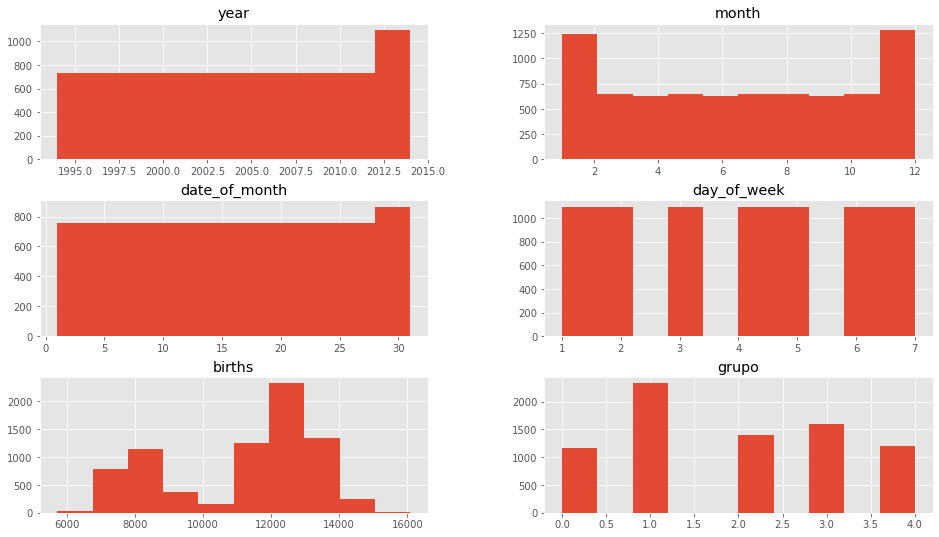

In [115]:
dataset.hist()
plt.show()

En la siguiente grafica se puede apreciar de mejor forma como están dividido los grupos, en la parte de en medio a la derecha podemos observar los 5 grupos que se crearon al igual de los colores que los representan, y como se puede apreciar el grupo con mayores nacimientos es el 1 (recordando que se empieza desde el 0), de ahí le seguiría el grupo 3, después el 2, después el 4 y por último el grupo 0.

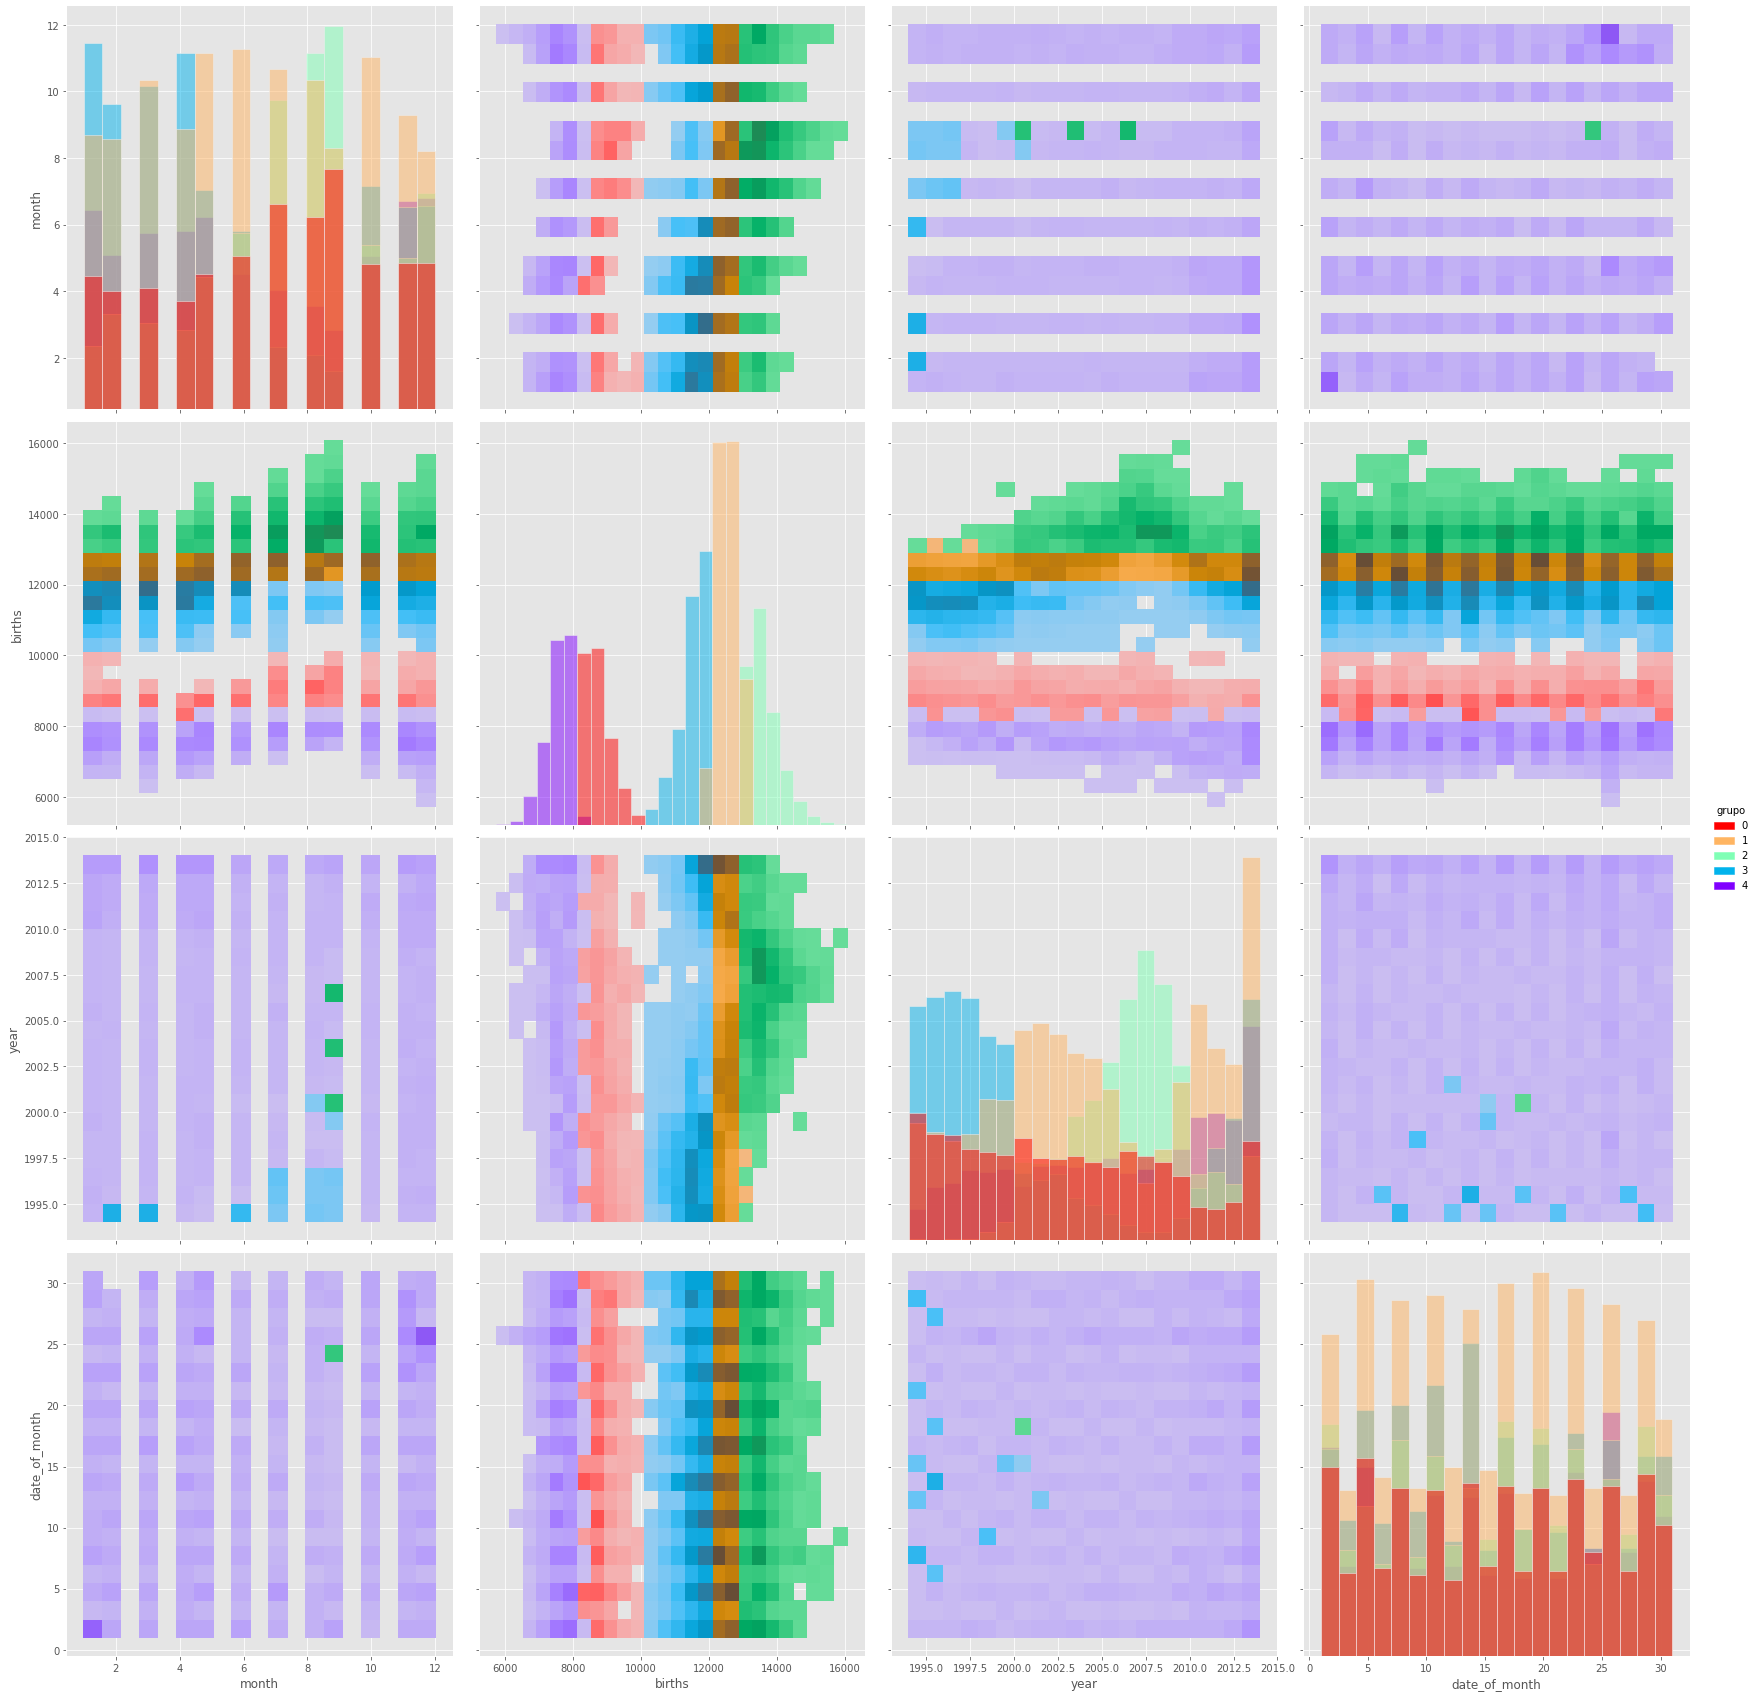

In [158]:
import seaborn as sb

sb.pairplot(dataset.dropna(), hue='grupo',height=6,vars=["month","births","year","date_of_month"],kind='hist',palette='rainbow_r')

## Conclusión 

En conclusión, como se puede aprovechar se pueden aprovechar las tecnologías de muchas formas, en esta ocasión solo se hicieron una clasificación de los cumpleaños más comunes o famosos, sin embargo, esto es solo un ejemplo del potencial que tiene este tipo de tecnologías. Nunca hay que olvidar que esto nos permite clasificar y presentarnos datos de una mejor forma, sin embargo, los datos requieren ser analizados e interpretados y eso nos toca a nosotros, por eso es importante empezar a estudiar y aprender mejores formas para interpretar y presentar los datos, ya que en la actualidad es muy útil y nunca olvidar tener cuidado con la toma de decisiones al interpretar los datos, siempre hay que apoyarse de personas expertos si se va comenzando.

## Referencias

https://data.world/makeovermonday/2021w26

https://www.sciencedirect.com/science/article/pii/S1877050915035929

https://www.zoho.com/inventory/guides/what-is-item-grouping.html

https://github.com/PhinanceScientist/Candy-Clustering.git

Cuaderno realizado para una práctica de <b>Heyner Fernando Cruz Guzmán</b> para la asignatura de <b>Business Intelligence</b> impartida por <b><a href="https://camo.githubusercontent.com/a493f6833f99fb3c85788d6d9305e6b7a42b838e5ee5d138fd9a8214a7e77472/68747470733a2f2f696d672e736869656c64732e696f2f62616467652f6c696e6b6564696e2d2532333030373742352e7376673f267374796c653d666f722d7468652d6261646765266c6f676f3d6c696e6b6564696e266c6f676f436f6c6f723d7768697465">Luis Novelo</a></b> en la <b>Universidad Modelo</b>.